In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [2]:
#making variable to hold the dataset
cancer_data=load_breast_cancer()

In [3]:
#making dataframe
cancer_df=pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

In [4]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
#getting information about data frame
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
#checking for null values
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [8]:
cancer_df['Target']=cancer_data.target
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
cancer_df.value_counts('Target')

Target
1    357
0    212
Name: count, dtype: int64

In [10]:
# 0 --> Malignant
# 1 --> Benign

<Axes: >

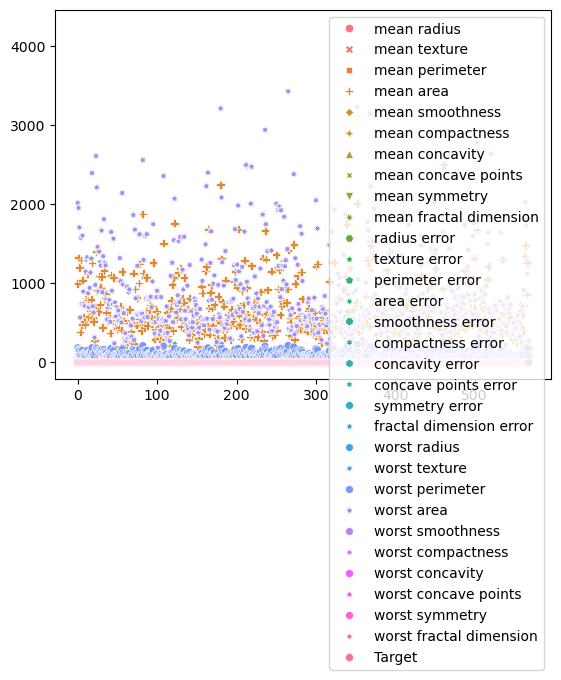

In [63]:
#DATA VISUALIZATION
sns.scatterplot(cancer_df)

<Axes: xlabel='Target', ylabel='count'>

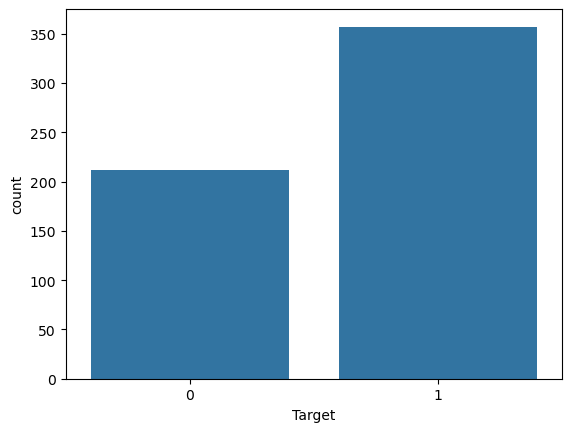

In [69]:
sns.countplot(x='Target', data=cancer_df)

In [75]:
corr=cancer_df.corr()

<Axes: >

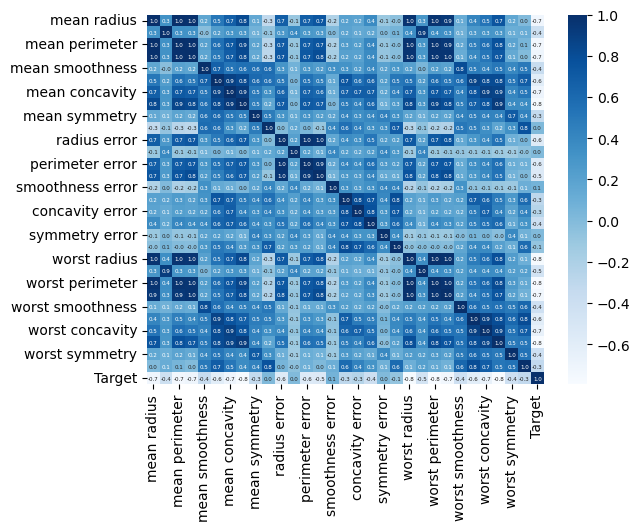

In [101]:
#plotting the heatmap
sns.heatmap(corr, cbar=True,cmap='Blues',annot=True, annot_kws={'size':4}, fmt='.1f')

In [12]:
#checking the data for standard deviation
cancer_data.data.std()

228.29740508276657

In [13]:
#the data is not standardized, thus we'll standardize it after splitting it

In [14]:
#making X and Y variables for data splitting
X=cancer_df.drop('Target',axis=1)
Y=cancer_df['Target']

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Target, Length: 569, dtype: int32


In [17]:
#NOW SPLITTING THE DATA
X_tr,X_ts,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=3)

In [18]:
print(X.shape,X_tr.shape,X_ts.shape)

(569, 30) (455, 30) (114, 30)


In [19]:
#STANDARDIZING THE DATA
scaler=StandardScaler()

In [20]:
scaler.fit(X_tr)
X_train=scaler.transform(X_tr)

In [21]:
X_test=scaler.transform(X_ts)

In [22]:
print(X_train.std(),X_test.std())

1.0 0.8654541077212674


In [23]:
#making prediction model
canc_model=LogisticRegression()

In [24]:
#fitting the data
canc_model.fit(X_train,Y_train)

LogisticRegression()

In [25]:
#checking accuracy score for training data
x_train_prediction=canc_model.predict(X_train)

In [26]:
train_accuracy=accuracy_score(Y_train,x_train_prediction)
print(train_accuracy)

0.989010989010989


In [27]:
#checking accuracy on testing data
x_test_prediction=canc_model.predict(X_test)

In [28]:
test_accuracy=accuracy_score(Y_test,x_test_prediction)
print(test_accuracy)

0.9736842105263158


In [29]:
#BUILDING A PREDICTIVE SYSTEM

In [30]:
inp_data=(13.73,22.61,93.6,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,0.07682,0.2121,1.169,2.061,19.21,0.006429,0.05936,0.05501,0.01628,0.01961,0.008093,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.1431)

#converting inp_data to numpy array to reshape and standardize
check=np.array(inp_data)
check_data=check.reshape(1,-1)
check_scaled=scaler.transform(check_data)


F:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
prediction=canc_model.predict(check_scaled)

if(prediction[0]==0):
    print("Cancer is malignant")
else:
    print("Cancer is benign")

Cancer is malignant
